# **Data Science and business Analytics (The Sparks Foundation - May 21')**

## Task 1 - **Prediction Using Supervised ML**
### Author: **Vrushabh S. Tumma**

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Loading the dataset

In [ ]:
data_url = "http://bit.ly/w-data"
data = pd.read_csv(data_url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### **Exploratory Data Analysis**

In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


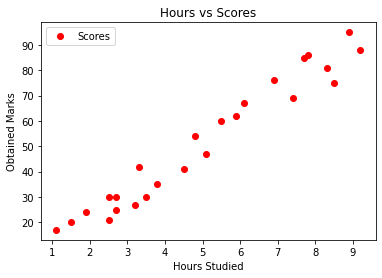

In [ ]:
data.plot(x="Hours", y="Scores", xlabel="Hours Studied", ylabel="Obtained Marks", style="o", c="red")
plt.title("Hours vs Scores")
plt.show()

From the above plot, we can conclude that there is a positive linear relation between **hours studied** and **obtained marks**

### **Preparing the data**

The next step is to dicide the data into **attributes** (inputs) and **labels** (outputs)

In [ ]:
X = data.iloc[:, :-1].values 
y = data.iloc[:, 1].values

Spliting the data into **training** and **test** sets.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### **Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Plotting the **regression line**

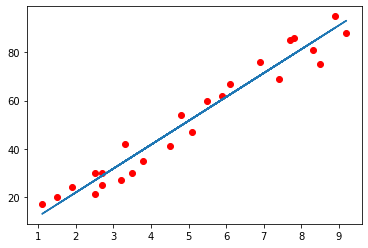

In [ ]:
line = lr.coef_*X+lr.intercept_

plt.scatter(X, y, c="red")
plt.plot(X, line)
plt.show()

### **Making Predictions**

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
df = pd.DataFrame({"Actual": y_test,
                   "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Task question**

What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
hours = 9.25
pred = lr.predict([[hours]])

print("No. of hours studied: ", hours)
print("Predicted score: ", pred[0])

No. of hours studied:  9.25
Predicted score:  93.69173248737539


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [ ]:
from sklearn import metrics

In [ ]:
mean_abe = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mean_abe)

Mean Absolute Error:  4.183859899002982
